In [1]:
import matplotlib.pyplot as plt
import numpy as np


In [2]:
from asi import path_config

root = path_config.camera_from_japan
path = root / "colorChecker.nh7"

In [3]:
path

PosixPath('/Users/hagayuya/Library/CloudStorage/GoogleDrive-haga.yuya2.2016@gmail.com/マイドライブ/Camera from Japan/colorChecker.nh7')

In [18]:
from pathlib import Path

path = Path(
    "/Users/hagayuya/Library/CloudStorage/GoogleDrive-haga.yuya2.2016@gmail.com/マイドライブ/Camera from Japan/colorChecker.nh7"
)

# uint16 float32 #count=spatial_pixels*sample_lines*spectral_bands '>u2' numpy.uint16
with path.open("rb") as fopen:
    raw_image = np.fromfile(fopen, dtype=np.uint16)

In [19]:
# Calculate number of bands from size of image
samples = 1280
lines = 1024

size_of_image = raw_image.shape[0]
bands = size_of_image // (samples * lines)
print(f"Number of bands: {bands}")

# Reshape the image to 3D array by bands, lines, samples
spectral_image = np.reshape(raw_image, (lines, bands, samples))
spectral_image = np.transpose(spectral_image, (0, 2, 1))

Number of bands: 151


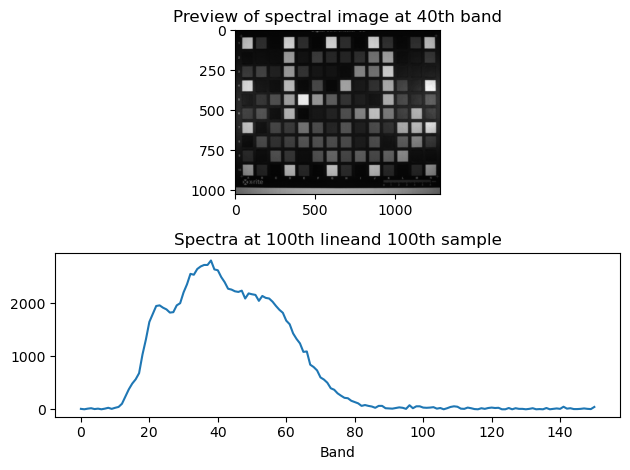

In [20]:
fig, axes = plt.subplots(2, 1, tight_layout=True)
axes[0].imshow(spectral_image[:, :, 40], cmap="gray")
axes[0].set_title("Preview of spectral image at 40th band")

axes[1].plot(spectral_image[100, 100, :])
axes[1].set_title("Spectra at 100th lineand 100th sample")
axes[1].set_xlabel("Band")
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


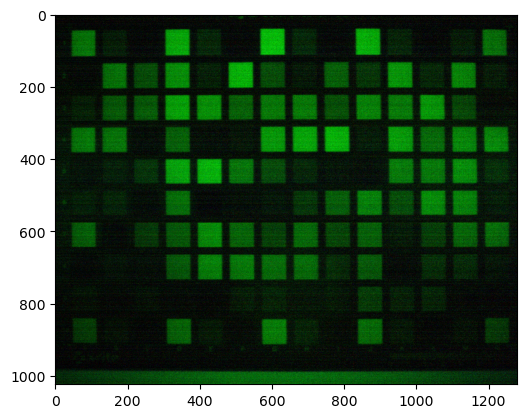

In [17]:
rgb_preview = spectral_image[:, :, [150, 80, 2]]
# rgb_preview = rgb_preview / np.max(rgb_preview)
# rgb_preview = np.clip(rgb_preview, 0, 1)
plt.imshow(rgb_preview)